<a href="https://colab.research.google.com/github/melchilegion/Qwasar.io/blob/main/classically_punk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install wave
!pip install seaborn
!pip install json
!pip intall numpy
!pip install sklearn
!pip install tensorflow
!pip install matplotlib

import wave
import os
import seaborn as sb
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, BatchNormalization , Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import classification_report

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json
ERROR: unknown command "intall" - maybe you meant "install"
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import os
import wave
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_waveform(path, num_rows=2, num_cols=5):
    folders = [folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]
    total_subplots = num_rows * num_cols
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 6))

    for i, folder in enumerate(folders):
        if i >= total_subplots:
            break

        folder_path = os.path.join(path, folder)
        audio_files = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

        for j, file in enumerate(audio_files):
            print(file)
            if j >= num_cols:
                break

            file_path = os.path.join(folder_path, file)

            # Read the audio file using wave
            with wave.open(file_path, 'rb') as wav_file:
                sr = wav_file.getframerate()
                n_samples = wav_file.getnframes()
                audio = wav_file.readframes(n_samples)
                audio = np.frombuffer(audio, dtype=np.int16)  # Assuming 16-bit PCM

            row = i // num_cols
            col = j  # Use j for column index
            sns.lineplot(x=np.arange(n_samples) / sr, y=audio, ax=axs[row, col])
            axs[row, col].set_title(f'{folder}/{file}')

    plt.tight_layout()
    fig.suptitle("Waveforms")
    fig.subplots_adjust(top=0.90)
    plt.savefig('waveforms_for_audio_files.png', dpi=300)
    plt.show()

disco.00000.wav
disco.00011.wav
disco.00010.wav
disco.00009.wav
disco.00008.wav
disco.00007.wav
hiphop.00099.wav
hiphop.00000.wav
hiphop.00006.wav
hiphop.00001.wav
hiphop.00003.wav
hiphop.00004.wav
country.00003.wav
country.00002.wav
country.00001.wav
country.00000.wav
country.00010.wav
country.00009.wav
classical.00002.wav
classical.00001.wav
classical.00000.wav
classical.00009.wav
classical.00008.wav
classical.00007.wav
blues.00000.wav
blues.00006.wav
blues.00005.wav
blues.00004.wav
blues.00003.wav
blues.00002.wav
reggae.00002.wav
reggae.00006.wav
reggae.00007.wav
reggae.00000.wav
reggae.00010.wav
reggae.00009.wav
jazz.00007.wav
jazz.00000.wav
jazz.00008.wav
jazz.00006.wav
jazz.00001.wav
jazz.00005.wav
pop.00002.wav
pop.00003.wav
pop.00001.wav
pop.00000.wav
pop.00009.wav
pop.00005.wav
rock.00000.wav
rock.00002.wav
rock.00007.wav
rock.00008.wav
rock.00005.wav
rock.00004.wav
metal.00002.wav
metal.00001.wav
metal.00000.wav
metal.00003.wav
metal.00007.wav
metal.00005.wav


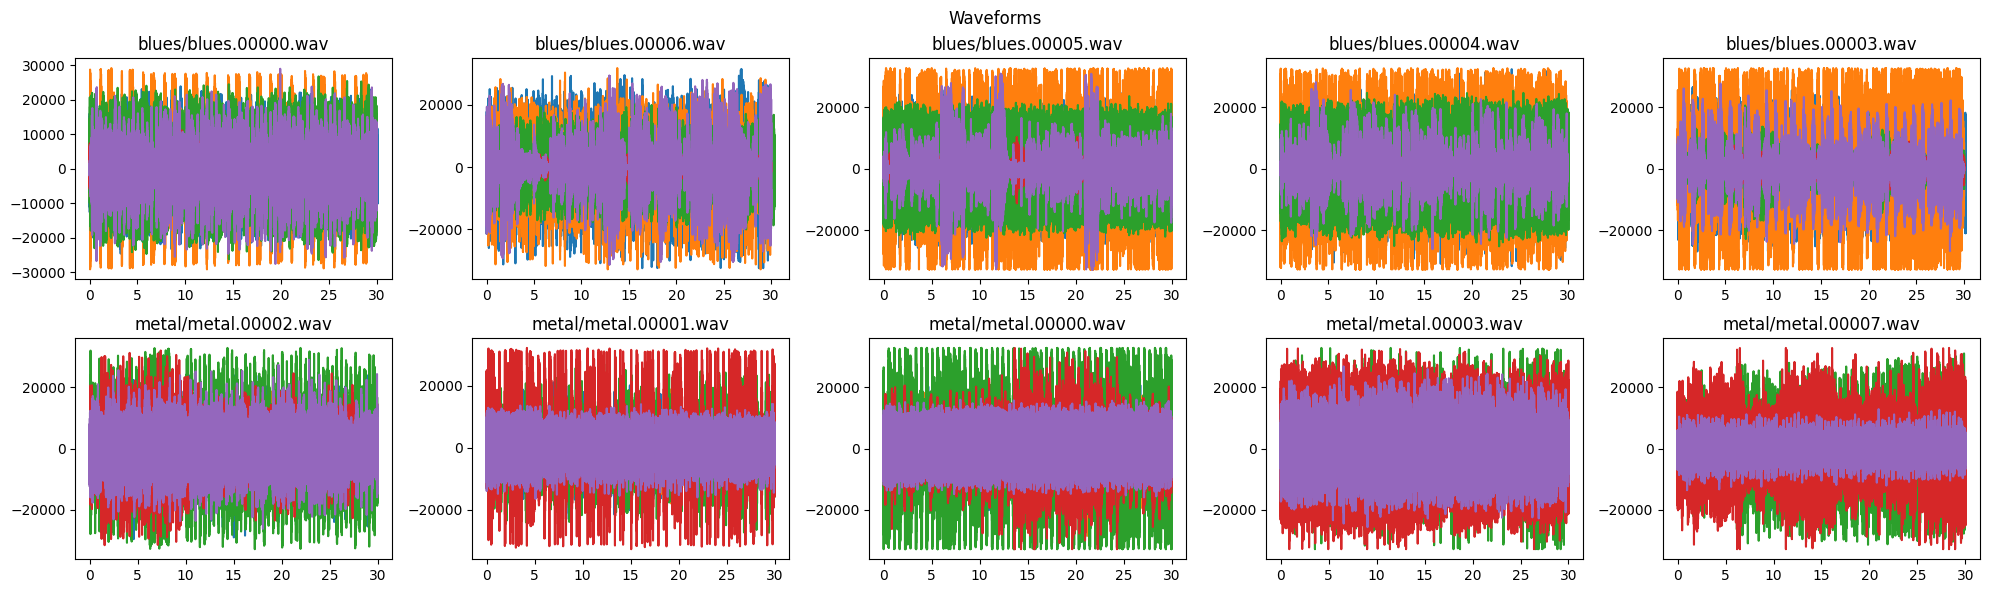

In [4]:
folder_path = "/content/drive/MyDrive/classically_punk_music_genres/genres"
plot_waveform(folder_path)

In [19]:
!pip install essentia
!pip install librosa

import os
import wave
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_waveform(path, num_rows=2, num_cols=5):
    folders = [folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]
    total_subplots = num_rows * num_cols
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 6))

    for i, folder in enumerate(folders):
        if i >= total_subplots:
            break

        #folder_path = os.path.join(path, folder)
        folder_path = "/content/drive/MyDrive/classically_punk_music_genres/genres"
        audio_files = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

        for j, file in enumerate(audio_files):
            print(file)
            if j >= num_cols:
                break

            file_path = os.path.join(folder_path, file)

            # Read the audio file using wave
            with wave.open(file_path, 'rb') as wav_file:
                sr = wav_file.getframerate()
                n_samples = wav_file.getnframes()
                audio = wav_file.readframes(n_samples)
                audio = np.frombuffer(audio, dtype=np.int16)  # Assuming 16-bit PCM

            row = i // num_cols
            col = j  # Use j for column index
            sns.lineplot(x=np.arange(n_samples) / sr, y=audio, ax=axs[row, col])
            axs[row, col].set_title(f'{folder}/{file}')

    plt.tight_layout()
    fig.suptitle("Waveforms")
    fig.subplots_adjust(top=0.90)
    plt.savefig('waveforms_for_audio_files.png', dpi=300)
    plt.show()

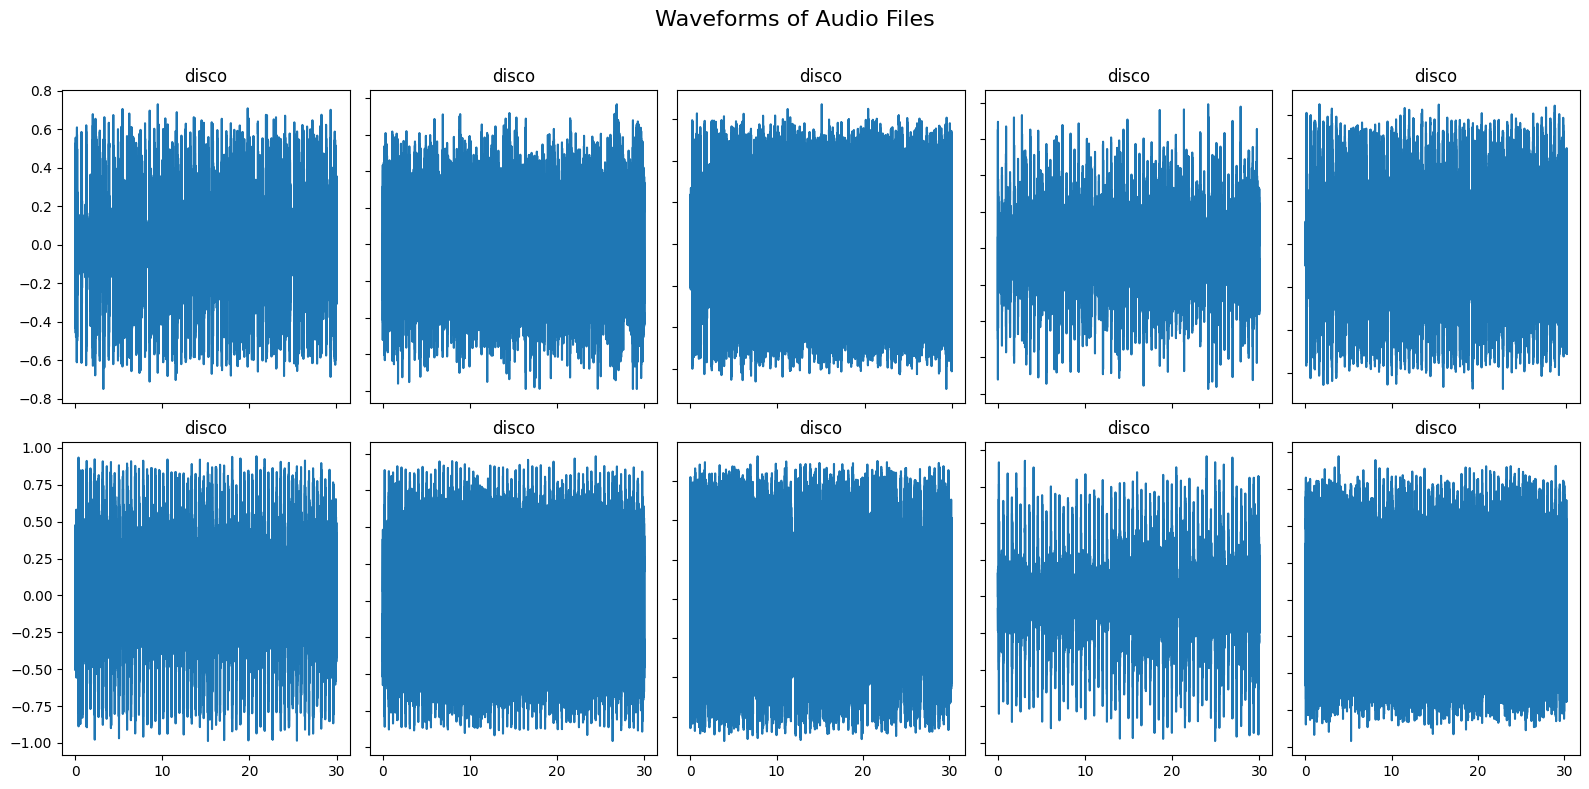

In [23]:
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np

def plot_waveform(directory_path, num_rows=2, num_cols=5):
    # Get a list of folders in the given directory
    folders = [folder for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder))]

    # Initialize the figure and axes for subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 8))
    subplot_idx = 0

    for folder in folders:
        folder_path = os.path.join(directory_path, folder)
        audio_files = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

        for file in audio_files:
            if subplot_idx >= num_rows * num_cols:
                break  # Stop if we reach the maximum number of subplots

            # Load the audio file
            file_path = os.path.join(folder_path, file)
            audio, sr = librosa.load(file_path, sr=None)

            # Determine the row and column in the subplot grid
            row, col = divmod(subplot_idx, num_cols)

            # Plot the waveform
            axs[row, col].plot(np.linspace(0, len(audio) / sr, num=len(audio)), audio)
            axs[row, col].set_title(folder)
            axs[row, col].label_outer()  # Hide x and y labels if not at the border

            subplot_idx += 1

    # Adjust the layout and add a title
    plt.tight_layout()
    fig.suptitle("Waveforms of Audio Files", fontsize=16)
    plt.subplots_adjust(top=0.88)

    # Save and show the figure
    plt.savefig('waveforms_grid.png', dpi=300)
    plt.show()

# Example usage
plot_waveform('/content/drive/MyDrive/classically_punk_music_genres/genres')

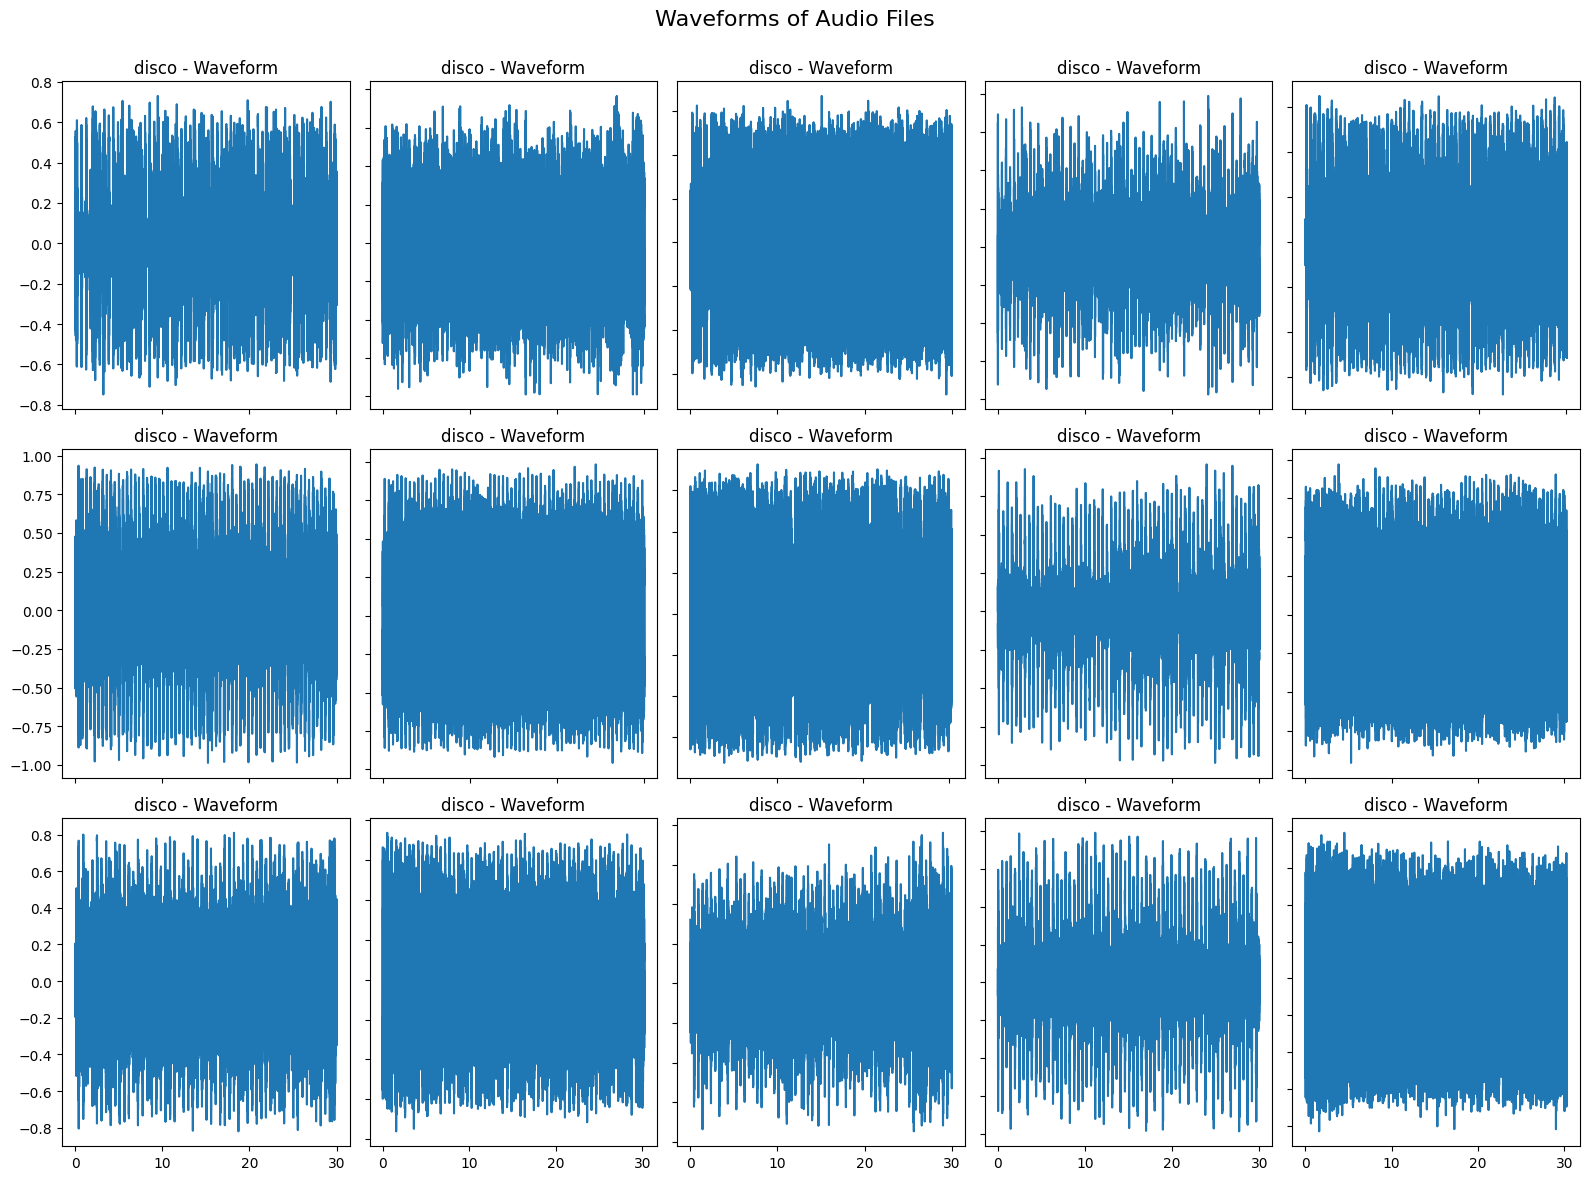

In [24]:
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np

def plot_audio_features(directory_path, num_rows=3, num_cols=5):
    # Get a list of folders in the given directory
    folders = [folder for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder))]

    # Initialize the figure and axes for subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 12))
    subplot_idx = 0

    for folder in folders:
        folder_path = os.path.join(directory_path, folder)
        audio_files = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

        for file in audio_files:
            if subplot_idx >= num_rows * num_cols:
                break  # Stop if we reach the maximum number of subplots

            # Load the audio file
            file_path = os.path.join(folder_path, file)
            audio, sr = librosa.load(file_path, sr=None)

            # Determine the row and column in the subplot grid
            row, col = divmod(subplot_idx, num_cols)

            # Plot the waveform
            axs[row, col].plot(np.linspace(0, len(audio) / sr, num=len(audio)), audio)
            axs[row, col].set_title(f"{folder} - Waveform")
            axs[row, col].label_outer()  # Hide x and y labels if not at the border

            subplot_idx += 1

    # Adjust the layout and add a title
    plt.tight_layout()
    fig.suptitle("Waveforms of Audio Files", fontsize=16)
    plt.subplots_adjust(top=0.92)

    # Save and show the figure
    plt.savefig('audio_waveforms_grid.png', dpi=300)
    plt.show()

# Example usage
plot_audio_features('/content/drive/MyDrive/classically_punk_music_genres/genres')

In [26]:
import os
import librosa
import numpy as np

def extract_mel_spectrogram(file_path, n_mels=128):
    try:
        # Load the audio file
        audio, sr = librosa.load(file_path, sr=None)

        # Extract Mel spectrogram
        mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)

        # Convert to log scale (dB)
        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

        # Ensure the spectrogram is not empty
        if log_mel_spectrogram.size == 0:
            raise ValueError(f"Empty feature array extracted from file: {file_path}")

        return log_mel_spectrogram

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Example usage
audio_directory = '/content/drive/MyDrive/classically_punk_music_genres/genres'
for file in os.listdir(audio_directory):
    if file.endswith('.wav'):
        file_path = os.path.join(audio_directory, file)
        features = extract_mel_spectrogram(file_path)  # Extract features

        if features is not None:  # Check if features were successfully extracted
            print(f"Features extracted for {file}: {features.shape}")
            print(features)  # Print the actual feature array
        else:
            print(f"Failed to extract features for {file}.")

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split

def prepare_data(X, y, test_size=0.1, validation_size=0.1):
    """
    Splits the dataset into training, validation, and test sets, and reshapes the input data.

    Parameters:
    - X: Input features (numpy array).
    - y: Target labels (numpy array).
    - test_size: Proportion of the dataset to include in the test split.
    - validation_size: Proportion of the training dataset to include in the validation split.

    Returns:
    - X_train: Training features (4D array).
    - X_validation: Validation features (4D array).
    - X_test: Test features (4D array).
    - y_train: Training labels.
    - y_validation: Validation labels.
    - y_test: Test labels.
    """
    # Splitting the data into test and train sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Splitting the training set into training and validation datasets
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size, random_state=42)

    # Adding a new axis to the numpy arrays to make them 4D arrays
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [28]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data (0-255 to 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the augmented data
model.fit(datagen.flow(x_train, y_train, batch_size=64),
          steps_per_epoch=len(x_train) // 64,
          epochs=50,
          validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 107s 134ms/step - accuracy: 0.2790 - loss: 1.9303 - val_accuracy: 0.4974 - val_loss: 1.4201
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:03 82ms/step - accuracy: 0.4688 - loss: 1.5065

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4688 - loss: 1.5065 - val_accuracy: 0.4926 - val_loss: 1.4280
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 133s 129ms/step - accuracy: 0.4303 - loss: 1.5585 - val_accuracy: 0.4847 - val_loss: 1.4673
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5312 - loss: 1.5130 - val_accuracy: 0.5059 - val_loss: 1.3814
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 138s 131ms/step - accuracy: 0.4875 - loss: 1.4292 - val_accuracy: 0.5603 - val_loss: 1.2233
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5000 - loss: 1.3032 - val_accuracy: 0.5639 - val_loss: 1.2049
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 136s 128ms/step - accuracy: 0.5146 - loss: 1.3602 - val_accuracy: 0.5999 - val_loss: 1.1213
Epoch 8/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5781 - loss: 1.2281 - val_accuracy: 0.5935 - val_loss: 1.1420
Epoch 9/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 102s 130ms/step - accuracy: 0.5348 - loss: 1.3025 - val_accurac

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data (0-255 to 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model with callbacks
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_test, y_test),
                    epochs=100,
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 105s 131ms/step - accuracy: 0.2751 - loss: 1.9503 - val_accuracy: 0.4732 - val_loss: 1.4543 - learning_rate: 0.0010
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 132ms/step - accuracy: 0.4388 - loss: 1.5434 - val_accuracy: 0.5461 - val_loss: 1.2552 - learning_rate: 0.0010
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 131ms/step - accuracy: 0.4823 - loss: 1.4310 - val_accuracy: 0.5662 - val_loss: 1.2239 - learning_rate: 0.0010
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 131ms/step - accuracy: 0.5140 - loss: 1.3662 - val_accuracy: 0.5753 - val_loss: 1.2036 - learning_rate: 0.0010
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 130ms/step - accuracy: 0.5355 - loss: 1.3037 - val_accuracy: 0.6341 - val_loss: 1.0521 - learning_rate: 0.0010
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 128ms/step - accuracy: 0.5504 - loss: 1.2655 - val_accuracy: 0.6191 - val_loss: 1.0765 - learning_rate: 0.0010
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 131ms/step -

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data (0-255 to 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

# Define the model with Dropout layers
num_classes = 10  # Number of classes in CIFAR-10
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer with 50% dropout rate
    Dense(64, activation='relu'),
    Dropout(0.5),  # Another Dropout layer
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_test, y_test),
                    epochs=100,
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data (0-255 to 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

# Define the model with L2 regularization
num_classes = 10  # Number of classes in CIFAR-10
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),   # L2 regularization
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_test, y_test),
                    epochs=100,
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 104s 131ms/step - accuracy: 0.3114 - loss: 1.9574 - val_accuracy: 0.5074 - val_loss: 1.4368 - learning_rate: 0.0010
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 133ms/step - accuracy: 0.4984 - loss: 1.4763 - val_accuracy: 0.5637 - val_loss: 1.3127 - learning_rate: 0.0010
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 129ms/step - accuracy: 0.5462 - loss: 1.3711 - val_accuracy: 0.6088 - val_loss: 1.1990 - learning_rate: 0.0010
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 104s 132ms/step - accuracy: 0.5815 - loss: 1.2935 - val_accuracy: 0.6282 - val_loss: 1.1651 - learning_rate: 0.0010
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 130ms/step - accuracy: 0.6014 - loss: 1.2423 - val_accuracy: 0.6151 - val_loss: 1.2074 - learning_rate: 0.0010
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 131ms/step - accuracy: 0.6083 - loss: 1.2181 - val_accuracy: 0.6548 - val_loss: 1.1194 - learning_rate: 0.0010
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 132ms/step - accuracy: 0

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def cnn_model(input_shape):
    # Create the model
    neural_network = Sequential()

    # Create the 1st Convolutional Layer
    neural_network.add(Conv2D(32, (2, 2), activation='relu', input_shape=input_shape))
    neural_network.add(MaxPooling2D((2, 2), strides=(1, 1), padding='same'))
    neural_network.add(BatchNormalization())

    # Create the 2nd Convolutional Layer
    neural_network.add(Conv2D(64, (2, 2), activation='relu'))
    neural_network.add(MaxPooling2D((2, 2), strides=(1, 1), padding='same'))
    neural_network.add(BatchNormalization())

    # Create the 3rd Convolutional Layer
    neural_network.add(Conv2D(32, (2, 2), activation='relu'))
    neural_network.add(MaxPooling2D((2, 2), strides=(1, 1), padding='same'))
    neural_network.add(BatchNormalization())

    # Flatten the Output and feed it into a dense layer
    neural_network.add(Flatten())
    neural_network.add(Dense(64, activation='relu'))
    neural_network.add(Dropout(0.3))

    # Output layer
    neural_network.add(Dense(10, activation='softmax'))

    return neural_network

# Example usage
input_shape = (128, 128, 1)  # Example input shape (height, width, channels)
model = cnn_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 127, 127, 32)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 127, 127, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 64)        │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 126, 126, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 125, 125, 32)        │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 125, 125, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 125, 125, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 500000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      32,000,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,017,866 (122.14 MB)

 Trainable params: 32,017,610 (122.14 MB)

 Non-trainable params: 256 (1.00 KB)

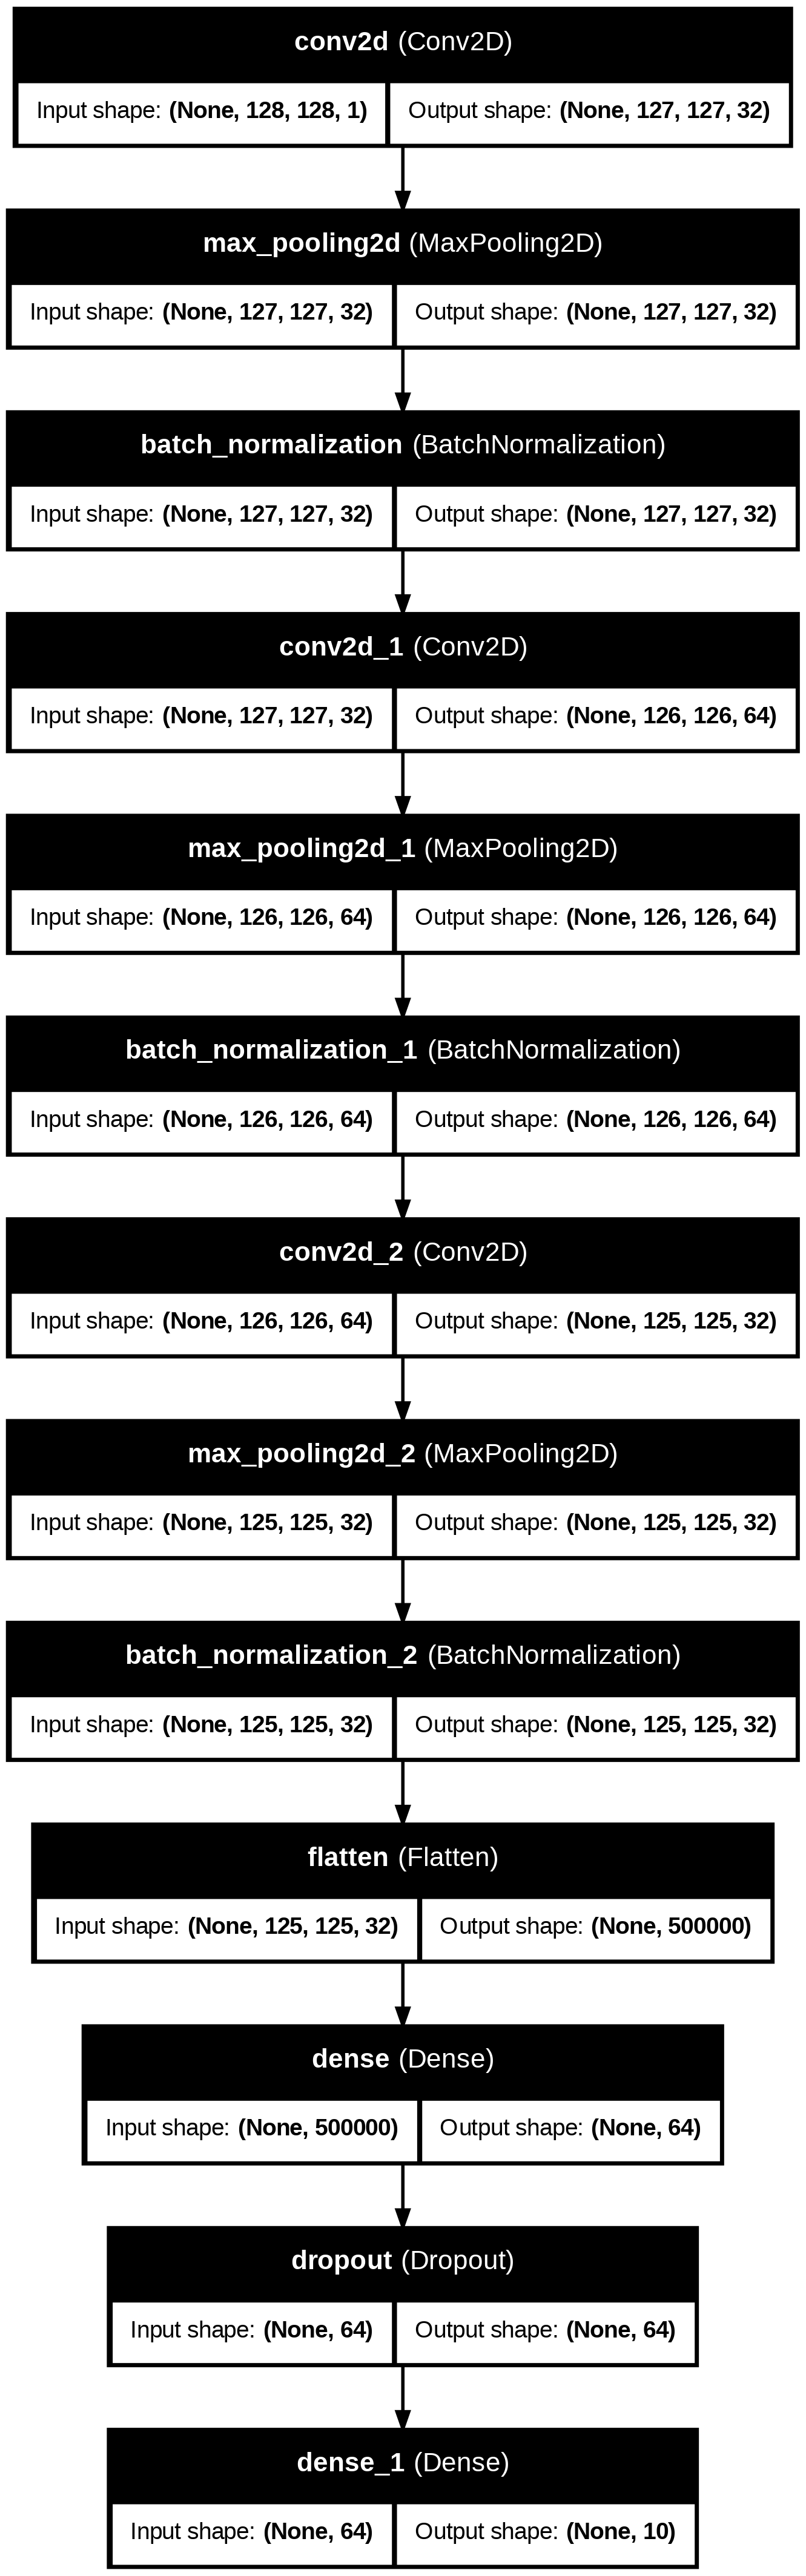

In [15]:
!pip install pydot
!pip install graphviz

from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='cnn_model_plot.png', show_shapes=True, show_layer_names=True)